In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("cirrhosis.csv")

In [3]:
df

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,414,681,D,NaN,24472,F,NaN,NaN,NaN,N,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,C,NaN,14245,F,NaN,NaN,NaN,N,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,C,NaN,20819,F,NaN,NaN,NaN,N,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,C,NaN,21185,F,NaN,NaN,NaN,N,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0


In [5]:
df.dtypes.value_counts()

float64    10
object      7
int64       3
Name: count, dtype: int64

In [6]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
ID,0.0,0.0
N_Days,0.0,0.0
Status,0.0,0.0
Drug,106.0,25.4
Age,0.0,0.0
Sex,0.0,0.0
Ascites,106.0,25.4
Hepatomegaly,106.0,25.4
Spiders,106.0,25.4
Edema,0.0,0.0


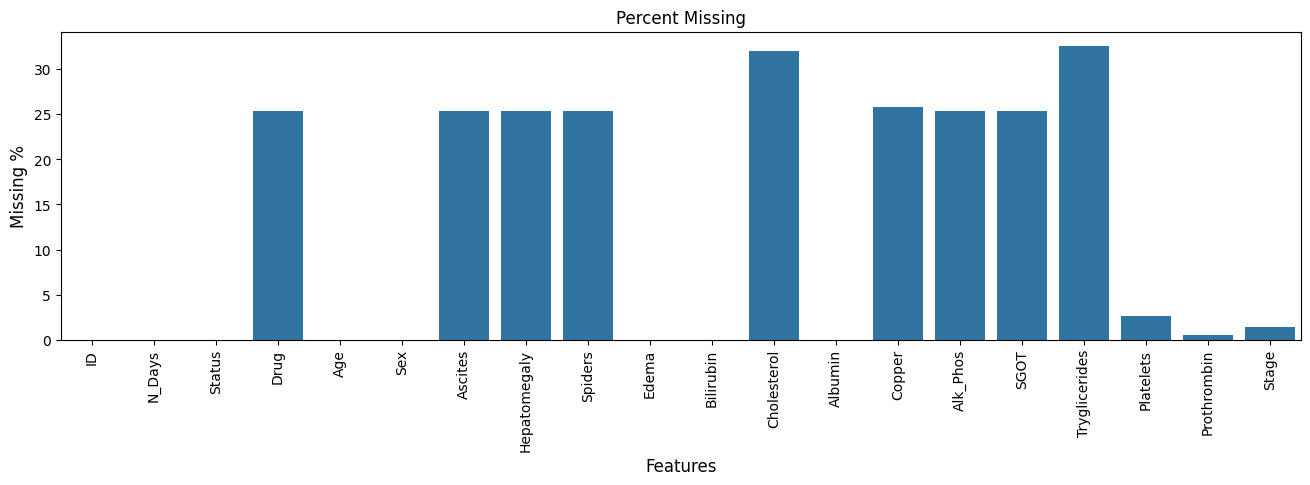

In [7]:
nan_df = ((df.isna().sum() / df.shape[0]*100)).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(x=nan_df['feature'], y=nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing %', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [8]:
df = df.dropna(subset='Drug')
df = df.drop('ID', axis=1)
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,C,D-penicillamine,22347,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,994,C,Placebo,21294,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,939,C,D-penicillamine,22767,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,839,C,D-penicillamine,13879,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [9]:
#  поменять потом на более красивое решение с DRY
# меняем dtype всех фич из object в int64, кроме Status, который является таргетом
df['Sex'] = df['Sex'].apply(lambda x:1 if x=='M' else 0)
df['Ascites'] = df['Ascites'].apply(lambda x:1 if x=='Y' else 0)
df['Hepatomegaly'] = df['Hepatomegaly'].apply(lambda x:1 if x=='Y' else 0)
df['Spiders'] = df['Spiders'].apply(lambda x:1 if x=='Y' else 0)
df['Edema'] = df['Edema'].apply(lambda x:2 if x=='Y' else (1 if x == 'S' else 0))
df['Drug'] = df['Drug'].apply(lambda x:1 if x=='D-penicillamine' else 0)
df.head(5)

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,1,21464,0,1,1,1,2,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,1,20617,0,0,1,1,0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,1,25594,1,0,0,0,1,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,1,19994,0,0,1,1,1,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,0,13918,0,0,1,1,0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


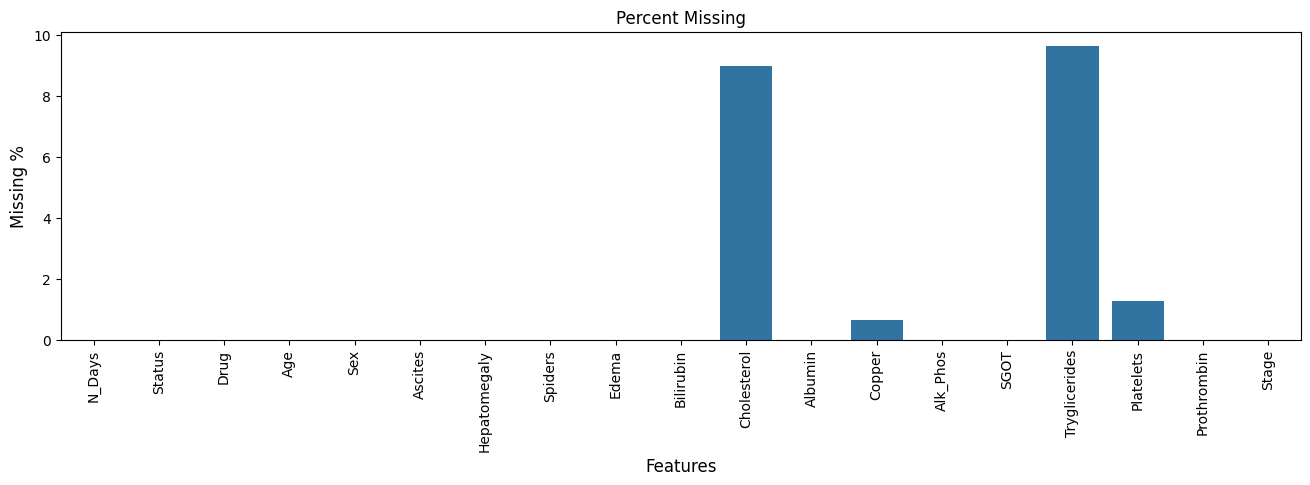

In [10]:
nan_df = ((df.isna().sum() / df.shape[0]*100)).reset_index()
nan_df.columns=['feature', 'nan_percent']

plt.figure(figsize=(16,4))
sns.barplot(x=nan_df['feature'], y=nan_df['nan_percent'])
plt.title('Percent Missing')
plt.ylabel('Missing %', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=90)
plt.show()

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,312.0,2006.362179,1123.280843,41.00,1191.00,1839.50,2697.250,4556.00
Drug,312.0,0.506410,0.500762,0.00,0.00,1.00,1.000,1.00
Age,312.0,18269.442308,3864.805407,9598.00,15427.75,18187.50,20715.000,28650.00
Sex,312.0,0.115385,0.319999,0.00,0.00,0.00,0.000,1.00
Ascites,312.0,0.076923,0.266897,0.00,0.00,0.00,0.000,1.00
Hepatomegaly,312.0,0.512821,0.500639,0.00,0.00,1.00,1.000,1.00
Spiders,312.0,0.288462,0.453775,0.00,0.00,0.00,1.000,1.00
Edema,312.0,0.221154,0.549014,0.00,0.00,0.00,0.000,2.00
Bilirubin,312.0,3.256090,4.530315,0.30,0.80,1.35,3.425,28.00
Cholesterol,284.0,369.510563,231.944545,120.00,249.50,309.50,400.000,1775.00


In [12]:
df.groupby('Status').mean().T

Status,C,CL,D
N_Days,2457.583333,1508.210526,1475.640000
Drug,0.494048,0.526316,0.520000
Age,17758.922619,15039.421053,19446.544000
Sex,0.065476,0.157895,0.176000
Ascites,0.005952,0.000000,0.184000
Hepatomegaly,0.357143,0.631579,0.704000
Spiders,0.196429,0.263158,0.416000
Edema,0.071429,0.105263,0.440000
Bilirubin,1.503571,3.131579,5.630400
Cholesterol,326.539474,439.500000,415.754386


In [13]:
df.groupby('Status').median().T

Status,C,CL,D
N_Days,2309.50,1435.00,1191.00
Drug,0.00,1.00,1.00
Age,17756.00,14939.00,19295.00
Sex,0.00,0.00,0.00
Ascites,0.00,0.00,0.00
Hepatomegaly,0.00,1.00,1.00
Spiders,0.00,0.00,0.00
Edema,0.00,0.00,0.00
Bilirubin,0.90,3.20,3.20
Cholesterol,292.00,343.50,339.00


In [14]:
#  поменять потом на более красивое решение с DRY
df['Cholesterol'] = df['Cholesterol'].fillna(
    df['Status'].apply(lambda x: 415.754386 if x == 'D' else (326.539474 if x == 'C' else 439.500000))
)
df['Copper'] = df['Copper'].fillna(
    df['Status'].apply(lambda x: 135.411290 if x == 'D' else (66.610778 if x == 'C' else 124.000000))
)
df['Tryglicerides'] = df['Tryglicerides'].fillna(
    df['Status'].apply(lambda x: 140.486726 if x == 'D' else (111.788079 if x == 'C' else 133.944444))
)
df['Platelets'] = df['Platelets'].fillna(
    df['Status'].apply(lambda x: 242.137097 if x == 'D' else (272.563636 if x == 'C' else 298.842105))
)

In [15]:
pd.DataFrame(df.isnull().sum(), 
            columns = ['missing_count']) \
.assign(missing_pct = lambda x: x['missing_count']/df.shape[0]*100).astype(float).round(1)

,missing_count,missing_pct
N_Days,0.0,0.0
Status,0.0,0.0
Drug,0.0,0.0
Age,0.0,0.0
Sex,0.0,0.0
Ascites,0.0,0.0
Hepatomegaly,0.0,0.0
Spiders,0.0,0.0
Edema,0.0,0.0
Bilirubin,0.0,0.0


In [16]:
any_match = df[df.isin(['NaN']).any(axis=1)]
print(any_match)

Empty DataFrame
Columns: [N_Days, Status, Drug, Age, Sex, Ascites, Hepatomegaly, Spiders, Edema, Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets, Prothrombin, Stage]
Index: []


In [17]:
df_corr = df

In [18]:
df_corr['Status'] = df_corr['Status'].apply(lambda x: 0 if x == 'D' else (1 if x == 'C' else 2))
df_corr = df_corr.corr()

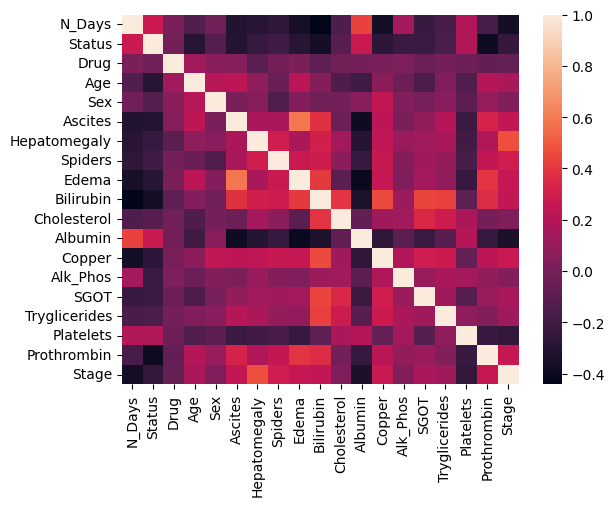

In [19]:
sns.heatmap(data=df_corr);

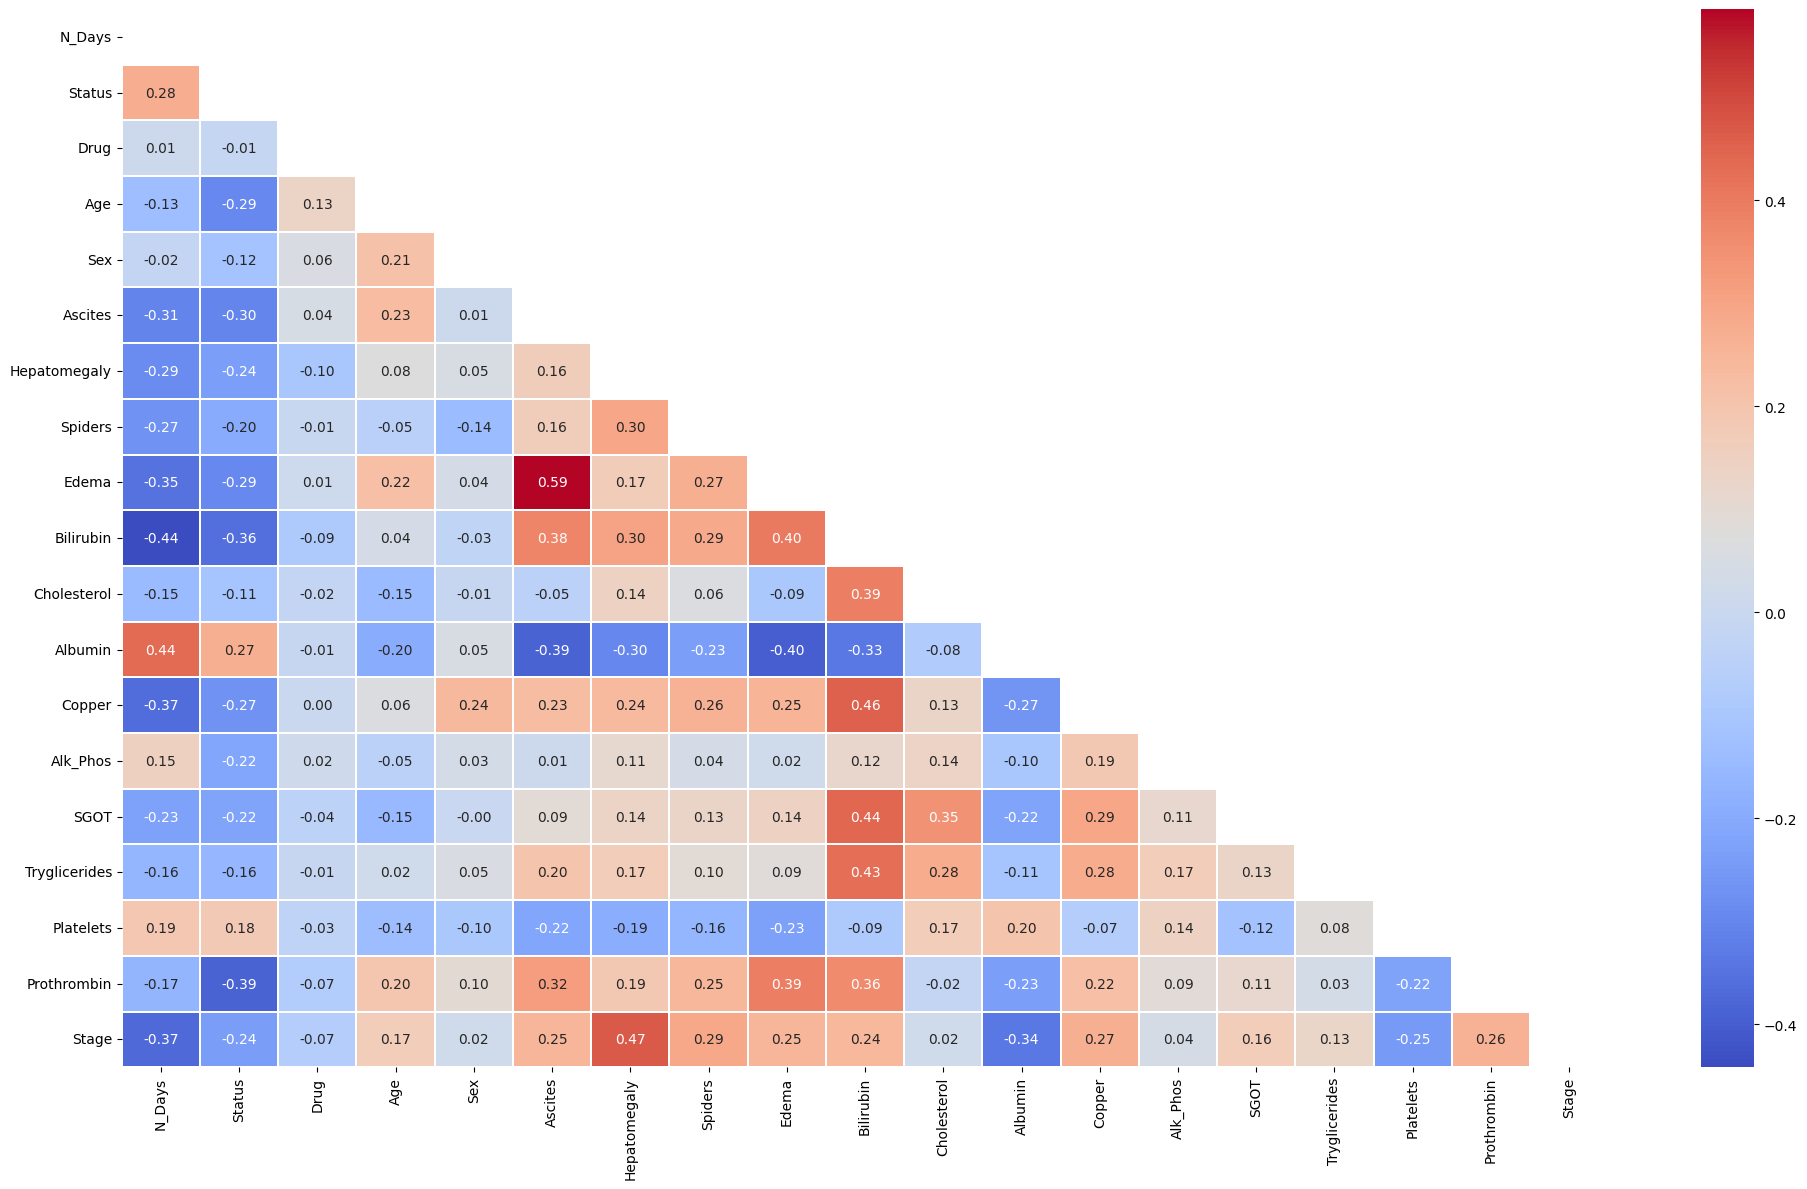

In [20]:
plt.figure(figsize=(20,12))
sns.heatmap(df_corr, linewidths=0.1, annot=True, fmt = ".2f", cmap = 'coolwarm', mask = np.triu(np.ones_like(df_corr, dtype=bool)))
plt.tight_layout()
plt.show()

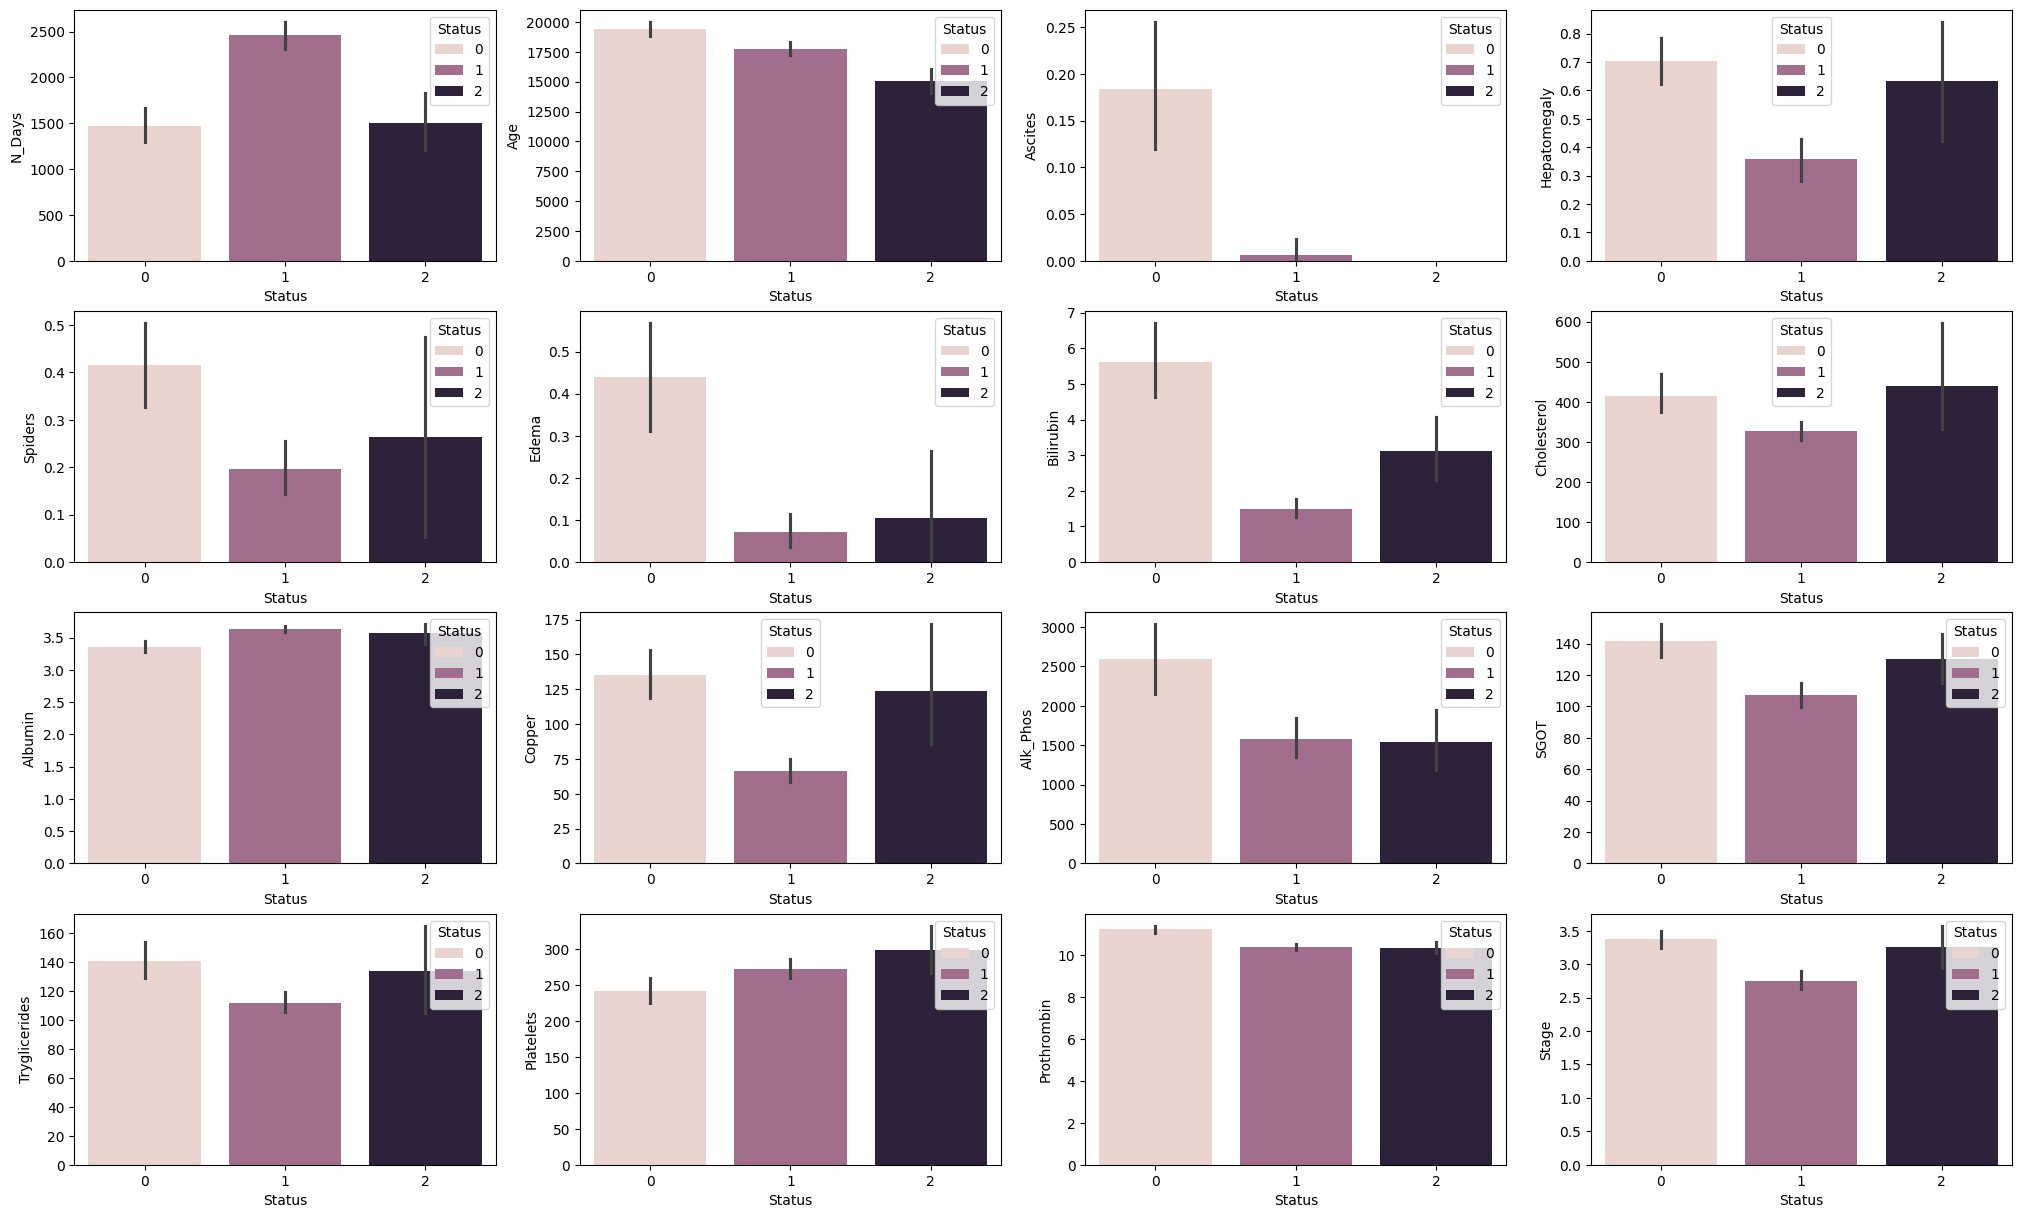

In [21]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15))

columns = ['N_Days','Age', 'Ascites', 'Hepatomegaly', 
           'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 
           'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
           'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.barplot(data=df, x='Status', y=col, hue='Status',ax=axs[row, col_idx])

plt.show()

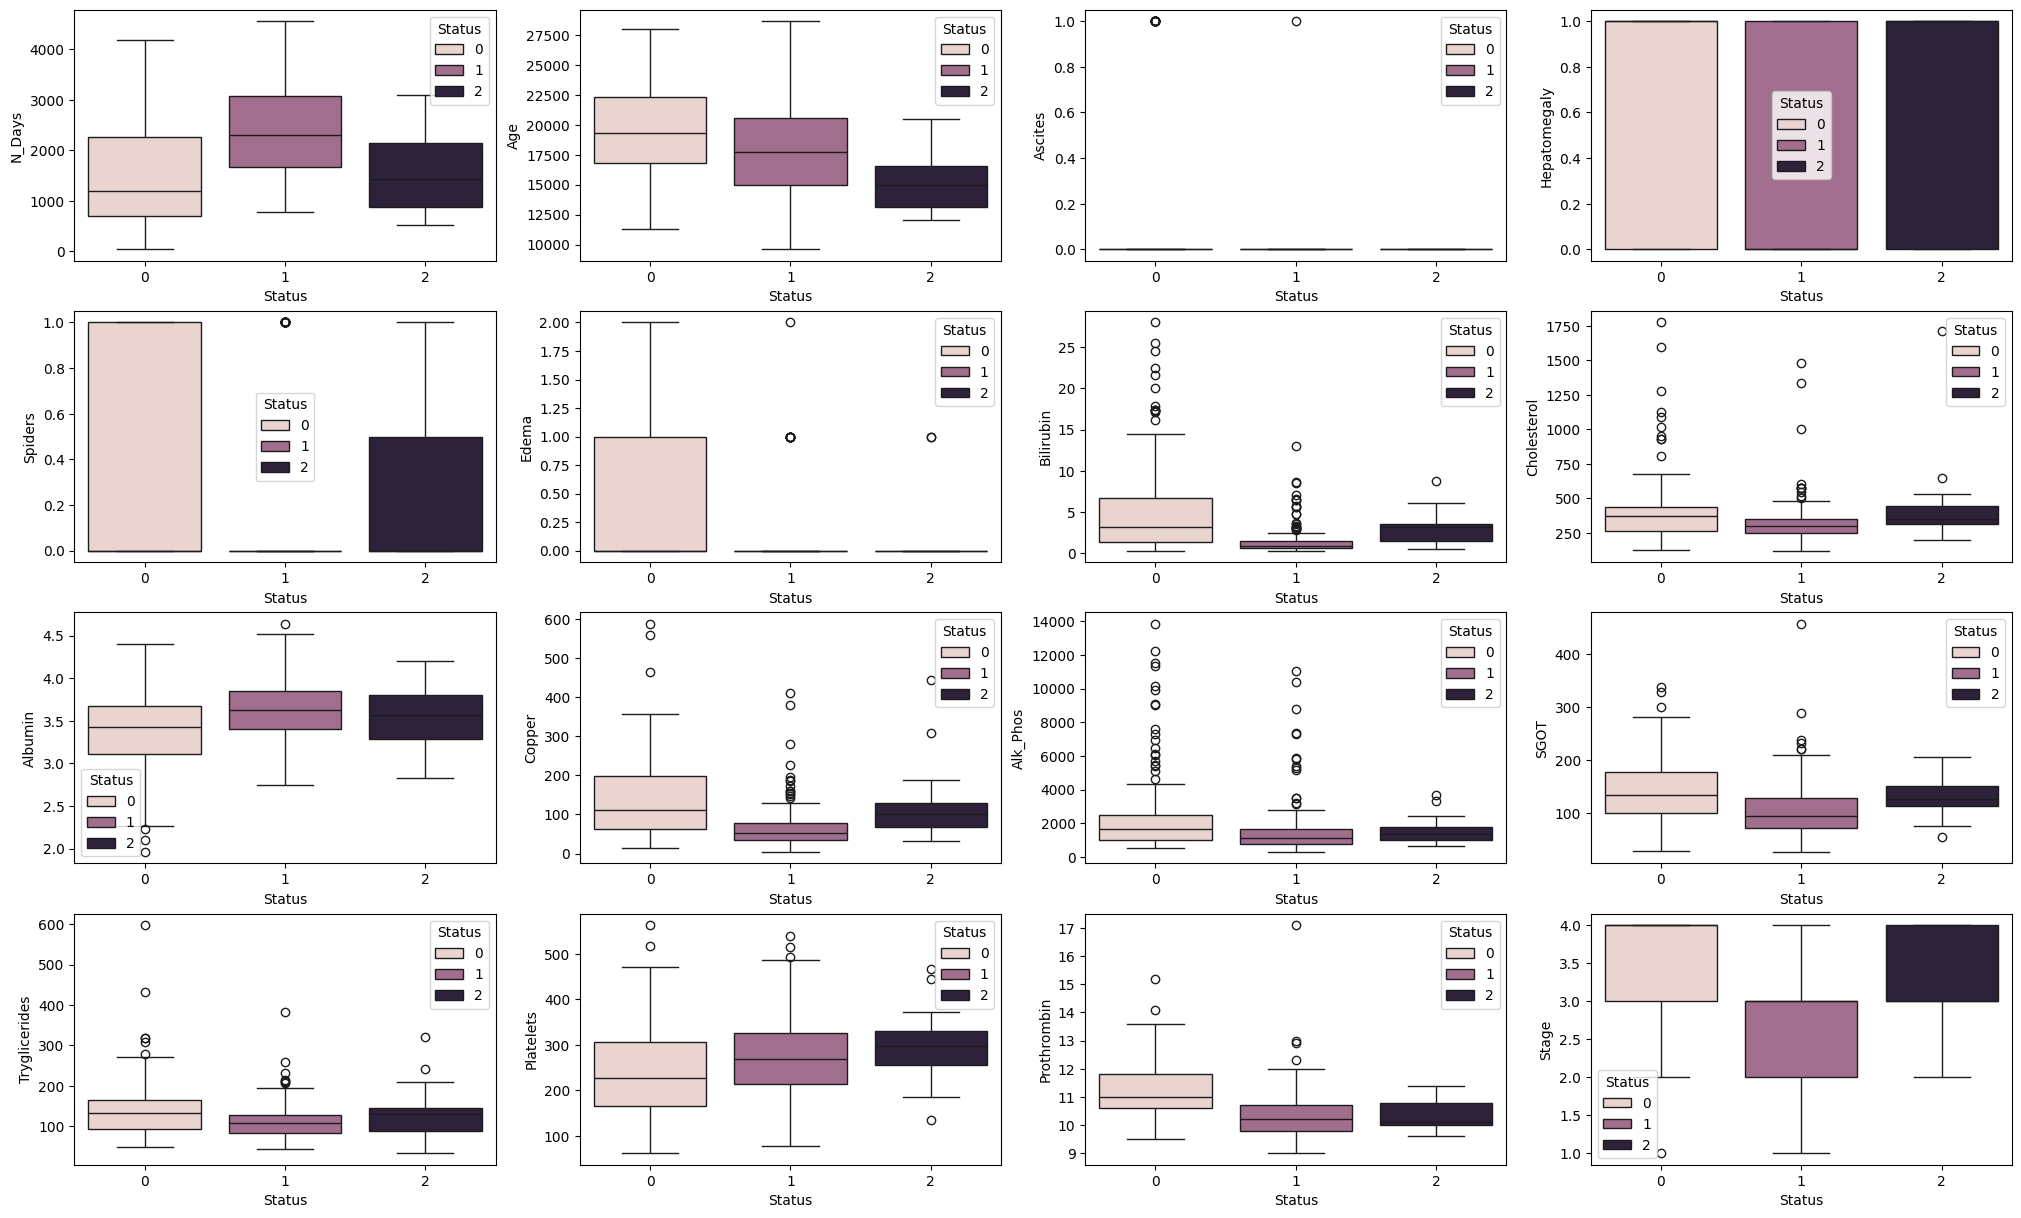

In [22]:
fig, axs = plt.subplots(4, 4, figsize=(25, 15))

columns = ['N_Days','Age', 'Ascites', 'Hepatomegaly', 
           'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 
           'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 
           'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']

for i, col in enumerate(columns):
    row = i // 4
    col_idx = i % 4
    sns.boxplot(data=df, x='Status', y=col, hue='Status',ax=axs[row, col_idx])

plt.show()